In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import StringIO
import lib

In [2]:
zip_filename = lib.download_file('http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv', to='temp')
csv_filename = lib.extract_csv_from_zip(zip_filename, in_dir='temp')
data         = lib.read_csv_pandas(csv_filename, ignore_lines = 3)

(1) Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA.

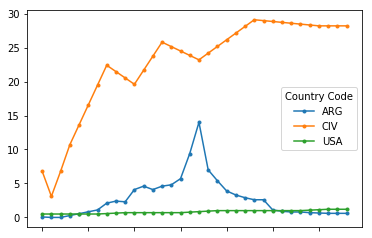

In [7]:
dd = lib.filter_country_code(data, 'ARG', 'CIV', 'USA')
dd = lib.normalize(dd)
lib.plot(dd)

(2) Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

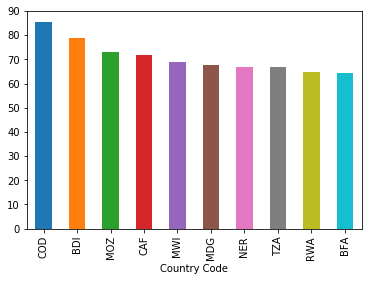

In [4]:
# I have chosen to use the mean poverty rate, instead of the poverty for a single year

df = data
df.index = lib.get_country_codes(df)
df = lib.get_years_data(df).transpose()
means = df.mean(numeric_only = True).dropna().sort_values(ascending = False)
means.loc[means.index[0:10]].plot.bar()

(3) Show the development of absolute poverty in all the central american countries.

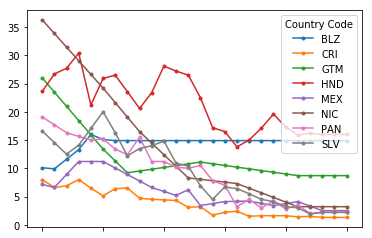

In [5]:
# https://en.wikipedia.org/wiki/United_Nations_geoscheme_for_the_Americas

dd = lib.filter_country_code(data, 'BLZ', 'CRI', 'SLV', 'GTM', 'HND', 'MEX', 'NIC', 'PAN')
dd = lib.normalize(dd)
lib.plot(dd)

(4) From the worldbank api, find one more interesting question you would like to ask.

How does the total GDP of all countries progress per year.

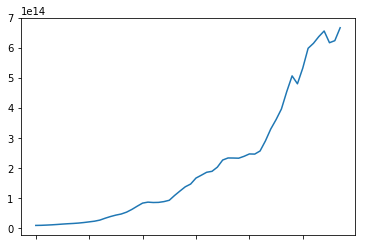

In [13]:
zip_filename = lib.download_file('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv', to='temp')
csv_filename = lib.extract_csv_from_zip(zip_filename, in_dir='temp')
gdp_data     = lib.read_csv_pandas(csv_filename, ignore_lines = 3)
gpd_data = gdp_data.interpolate()

lib.get_years_data(gdp_data).sum().transpose()[:-1].plot()